In [1]:
# Jaccard & Cosine Similarity

In [1]:
def jaccard(d1,d2):
    w_d1=set(d1.lower().split())
    w_d2=set(d2.lower().split())
    
    intersection=w_d1.intersection(w_d2)
    union=w_d1.union(w_d2)
#     print(intersection)
#     print(union)
    k=len(intersection)/len(union)
    print(f"Jaccard Similarity of {d1} and {d2} is {k}")
    
d1="data is a crude  oil"
d2="data is a new oil"
jaccard(d1,d2)

#cosine similarity
d_1="my name is ganesh"
d_2="my name is ganesh udutha"
data=[d_1,d_2]
# print(data)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tf_vect=TfidfVectorizer()
vect_matrix=tf_vect.fit_transform(data)
token=tf_vect.get_feature_names_out()
cosine_similarity=cosine_similarity(vect_matrix)
print(cosine_similarity)
cos_df=pd.DataFrame(cosine_similarity,columns=['d_1','d_2'],index=['d_1','d_2'])
print("The cosine similarity :\n ",cos_df)

Jaccard Similarity of data is a crude  oil and data is a new oil is 0.6666666666666666
[[1.         0.81818021]
 [0.81818021 1.        ]]
The cosine similarity :
           d_1      d_2
d_1  1.00000  0.81818
d_2  0.81818  1.00000


In [1]:
#Page Rank with weighted edge

{'A': 0.387789442707259, 'B': 0.21481051315058508, 'C': 0.3974000441421556}


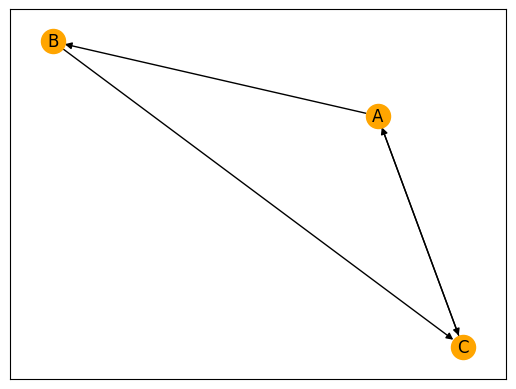

In [14]:
import networkx as nx
import pylab as plt
from sklearn.metrics.pairwise import cosine_similarity
D=nx.DiGraph()
D.add_weighted_edges_from([('A','B',1),('A','C',1),('C','A',1),('B','C',1)])
ppr1=nx.pagerank(D)
print(ppr1)
nx.draw_networkx(D,with_labels=True,node_color="orange")
plt.show()

In [2]:
# Page Rank with non Wieghted Edges

DiGraph with 7 nodes and 9 edges
{'A': 0.38585276964764476, 'B': 0.10023006489919678, 'C': 0.021428571428571432, 'D': 0.18541497884840932, 'E': 0.021428571428571432, 'F': 0.10023006489919678, 'G': 0.18541497884840932}


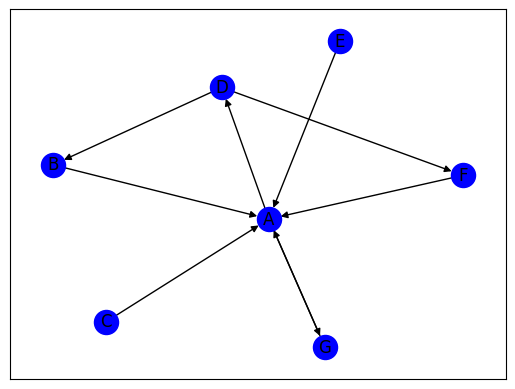

In [19]:
import networkx as nx
import pylab as plt

G=nx.DiGraph()
[G.add_node(k) for k in ['A','B','C','D','E','F','G']]
G.add_edges_from([('A','G'),('G','A'),('E','A'),('C','A'),('A','D'),('F','A'),('D','F'),('D','B'),('B','A')])
print(G)
ppr1=nx.pagerank(G)
print(ppr1)
ps=nx.spiral_layout(G)
nx.draw_networkx(G,with_labels=True,node_color="blue")

In [21]:
# Page rank without using NetworkX

In [38]:
def page_rank(graph,damping_factor=0.85,max_iterations=100,tolerance=1e-6):
    num_graph=len(graph)
    print(num_graph)
    initial_graph=1.0/num_graph
    print(initial_graph)
    
    #initialize the page rank
    
    page_ranks={page:initial_graph for page in graph}
    for _ in range(max_iterations):
        new_page_rank={}
        for page in graph:
            new_rank=(1-damping_factor)/num_graph
            
            for link in graph:
                if page in graph[link]:
                    new_rank+=damping_factor*(page_ranks[link]/len(graph[link]))
            new_page_rank[page]=new_rank
        
        convergence=all(abs(new_page_rank[page]-page_ranks[page])<tolerance for page in graph)
        
        page_ranks=new_page_rank
        if convergence:
            break
    return page_ranks
#             print(new_rank)

if __name__=="__main__":
 example_graph={
 'A':['B','C'],
 'B':['A'],
 'C':['B','A'],
 'D':['B']
 }
result=page_rank(example_graph)
print(result)
for page,rank in result.items():
    print(f"Page:{page}-PageRank: {rank:.4f}")
print("***************** this normal break *****************")
for page,rank in sorted(result.items(),key=lambda x:x[1],reverse=True):
    print(f"Page:{page}-PageRank: {rank:.4f}")

4
0.25
{'A': 0.4135120642427259, 'B': 0.33574560301074596, 'C': 0.21324233274652804, 'D': 0.037500000000000006}
Page:A-PageRank: 0.4135
Page:B-PageRank: 0.3357
Page:C-PageRank: 0.2132
Page:D-PageRank: 0.0375
***************** this normal break *****************
Page:A-PageRank: 0.4135
Page:B-PageRank: 0.3357
Page:C-PageRank: 0.2132
Page:D-PageRank: 0.0375


In [42]:
#map Reduce

In [62]:
from functools import reduce
from collections import defaultdict
def mapper(data):
    char_count=defaultdict(int)
    for char in data:
        if char.isalpha():
            char_count[char.lower()]+=1
#     print(char_count.items())
    return char_count.items()
def reducer(c1,c2):
    mergerd_count=defaultdict(int)
    for char,count in c1:
        mergerd_count[char]+=count
    for char,count in c2:
        mergerd_count[char]+=count
    return mergerd_count.items()
if __name__=="__main__":
    dataset="Hello, World! This is a Map reduce Example."
 # Map step
    chunks=[chunk for chunk in dataset.split()]
    print(chunks)
 #final Map step
    mapped_results=map(mapper,chunks)
 # reduce step
    final_counts=reduce(reducer,mapped_results)
    print(final_counts)
    for char, count in final_counts:
         print(f"Character :{char} , Count: {count}")

['Hello,', 'World!', 'This', 'is', 'a', 'Map', 'reduce', 'Example.']
dict_items([('h', 2), ('e', 5), ('l', 4), ('o', 2), ('w', 1), ('r', 2), ('d', 2), ('t', 1), ('i', 2), ('s', 2), ('a', 3), ('m', 2), ('p', 2), ('u', 1), ('c', 1), ('x', 1)])
Character :h , Count: 2
Character :e , Count: 5
Character :l , Count: 4
Character :o , Count: 2
Character :w , Count: 1
Character :r , Count: 2
Character :d , Count: 2
Character :t , Count: 1
Character :i , Count: 2
Character :s , Count: 2
Character :a , Count: 3
Character :m , Count: 2
Character :p , Count: 2
Character :u , Count: 1
Character :c , Count: 1
Character :x , Count: 1


In [63]:
#HITS Algorithm

In [70]:
import networkx as nx

G=nx.DiGraph()
G.add_edges_from([(1,2),(1,3),(2,4),(3,4),(4,5)])
print(G)
authority_score,hub_scores=nx.hits(G)
print(f"The Authority Score is {authority_score}\n Hub Score is {hub_scores}")

DiGraph with 5 nodes and 5 edges
The Authority Score is {1: 0.5455349472591255, 2: 0.2272325263704372, 3: 0.2272325263704372, 4: -4.970512130912921e-17, 5: -0.0}
 Hub Score is {1: -0.0, 2: 0.35297483775865784, 3: 0.3529748377586578, 4: 0.2940503244826844, 5: -6.432092835852985e-17}


In [71]:
#Twetter

In [ ]:
import pandas as pd
from ntscraper import Nitter
scrapper=Nitter()
tweets=scrapper.get_tweets("david bombal",mode='user',number=5)
final_tweets=[]
for tweet in tweets:
    data=[tweet['link'],tweet['text'],tweet['date'],tweet['stats']['likes']]
    final_tweets.append(data)
    
tweet_pd=pd.DataFrame(final_tweets,columns=['Links','Text','Date','Likes'])
tweet_pd

In [80]:
#bitwise operation

In [88]:
def bitwise_operation(a,b):
    bitwise_and_result = a & b
    print("a & b =",bitwise_and_result)
    
    bitwise_or_result= a|b
    print("a or b=",bitwise_or_result)
    
    bitwise_not_result_a=~a
    print("~a =",bitwise_not_result_a)
    
    bitwise_not_result_b=~b
    print("~b=",bitwise_not_result_b)
    
    bitwise_xor_result=a^b
    print("A ^ B=",bitwise_xor_result)
    
    bitwise_rightshift_result_a=a>>1
    print("a >>> 1=",bitwise_rightshift_result_a)
    
    bitwise_rightshift_result_b=b>>1
    print("b>>1=",bitwise_rightshift_result_b)
    
    bitwise_leftshift_result_a=a<<1
    print("a<<1",bitwise_leftshift_result_a)
    
    bitwise_leftshift_result_b=b<<1
    print("b<<1",bitwise_leftshift_result_b)
    
a=int(input("Enter the number :"))
b=int(input("Enter the number :"))

bitwise_operation(a,b)

Enter the number :1010
Enter the number :1110
a & b = 82
a or b= 2038
~a = -1011
~b= -1111
A ^ B= 1956
a >>> 1= 505
b>>1= 555
a<<1 2020
b<<1 2220


In [16]:
#using Term incidence Matrix

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
print('Boolean RetrievalModal Using Bitwise Operations on Term Document Incidence Matrix\n')
# corpus={"this is the first document of mine and doing IR Practical Examination."}
corpus={'this is the first document','this is the second document','and this is the third document','Is this the first document'}
print("The corpus is :\n",corpus)
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(corpus)
df=pd.DataFrame(x.toarray(),columns=vectorizer.get_feature_names_out())
print("The Generated Data Frame is :\n")
print(df)
print("\nQuery processing on Term Document Incidence Matrix")
#AND
print("\nFind all document ids for query 'this' AND 'first'")
alldata = df[(df['this']==1)&(df['first']==1)]
print("Document ids where with 'this' AND 'first are present are: '", alldata.index.tolist())
#OR
print("\nFind all document ids for query 'this' OR 'document'")
alldata1=df[(df['this']==1)|(df['document']==1)]
print("Document ids where with 'this' OR 'document' are present are:\n", alldata1.index.tolist())
#NOT
print("\n Find all Documents ids for query not 'document'")
alldata2=df[(df['document']!=1)]
print("\n Document ids where with NOT 'document' are present are:",alldata2.index.tolist())

Boolean RetrievalModal Using Bitwise Operations on Term Document Incidence Matrix

The corpus is :
 {'this is the second document', 'this is the first document', 'Is this the first document', 'and this is the third document'}
The Generated Data Frame is :

   and  document  first  is  second  the  third  this
0    0         1      0   1       1    1      0     1
1    0         1      1   1       0    1      0     1
2    0         1      1   1       0    1      0     1
3    1         1      0   1       0    1      1     1

Query processing on Term Document Incidence Matrix

Find all document ids for query 'this' AND 'first'
Document ids where with 'this' AND 'first are present are: ' [1, 2]

Find all document ids for query 'this' OR 'document'
Document ids where with 'this' OR 'document' are present are:
 [0, 1, 2, 3]

 Find all Documents ids for query not 'document'

 Document ids where with NOT 'document' are present are: []


In [17]:
# XML Retreival using Networkx

In [35]:
import xml.etree.cElementTree as ET
import networkx as nx

def parse_xml(xml_data):
    root=ET.fromstring(xml_data)
    print(root)
    return root

def generate_web_graph(xml_root):
    G=nx.DiGraph()
    
    for page in xml_root.findall('.//page'):
        page_id=page.find('id').text
        G.add_node(page_id)
        
        links=page.findall('.//link')
        for link in links:
            target_page_link=link.text
            G.add_edge(page_id,target_page_link)
            
    return G

def compute_topic_specific_pagerank(graph,topic_nodes,alpha=0.85,max_iter=100,tol=1e-6):
    personalization={node:1.0 if node in topic_nodes else 0.0 for node in graph.nodes}
    return nx.pagerank(graph,alpha=alpha,personalization=personalization,max_iter=max_iter,tol=tol)


xml_data='''<webgraph>
<page>
<id>1</id>
<link>2</link>
<link>3</link>
</page>
<page>
<id>2</id>
<link>1</link>
<link>3</link>
</page>
<page>
<id>3</id>
<link>2</link>
<link>1</link>
</page>
</webgraph>'''
xml_root=parse_xml(xml_data)
web_graph=generate_web_graph(xml_root)
topic_specific_pagerank=compute_topic_specific_pagerank(web_graph,topic_nodes=['1','2'],alpha=0.85,max_iter=100,tol=1e-6)
for node,score in topic_specific_pagerank.items():
    print(f"The Node {node} with Page rank {score:4f}")
    

<Element 'webgraph' at 0x00000212BDFDDC10>
The Node 1 with Page rank 0.350877
The Node 2 with Page rank 0.350877
The Node 3 with Page rank 0.298246


In [36]:
# using cElementTree

In [44]:
import xml.etree.ElementTree as ET

xml_data='''<root>
<person>
<name>ganesh</name>
<age>20</age>
<city>mumbai</city>
</person>
<person>
<name>bunny</name>
<age>20</age>
<city>baopet</city>
</person>
<person>
<name>gautham</name>
<age>10</age>
<city>hyderabad</city>
</person>
</root>
'''

tree=ET.fromstring(xml_data)

for person in tree.findall("person"):
    name=person.find('name').text
    age=person.find('age').text
    city=person.find('city').text
    
    print(f"Person Name is ' {name} ' and with age: ' {age} ' live in city: ' {city} '")

Person Name is ' ganesh ' and with age: ' 20 ' live in city: ' mumbai '
Person Name is ' bunny ' and with age: ' 20 ' live in city: ' baopet '
Person Name is ' gautham ' and with age: ' 10 ' live in city: ' hyderabad '


In [45]:
#XML Retreival using lxml

In [48]:
from lxml import etree

xml_data='''<root>
<person>
<name>ganesh</name>
<age>20</age>
<city>mumbai</city>
</person>
<person>
<name>bunny</name>
<age>20</age>
<city>baopet</city>
</person>
<person>
<name>gautham</name>
<age>10</age>
<city>hyderabad</city>
</person>
</root>
'''
tree=etree.fromstring(xml_data)

for person in tree.xpath("//person"):
    name=person.xpath("name/text()")[0]
    age=person.xpath("age/text()")[0]
    city=person.xpath("city/text()")[0]
    
    print(f"The Person with name {name} & with age: {age} live in city: {city}")

The Person with name ganesh & with age: 20 live in city: mumbai
The Person with name bunny & with age: 20 live in city: baopet
The Person with name gautham & with age: 10 live in city: hyderabad
